In [1]:
import sys,os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'
import numpy as np
import matplotlib.pyplot as plt
import cv2
import wandb
import optuna
# from sympy import *
from sympy import diff,Symbol,Matrix,symbols,solve,simplify,binomial,lambdify,poly
from sympy.abc import a,b,c
# init_session()
from sympy import var
# px,py =var('px:4'),var('py:4')
from statistics import mean
import datetime
import time
datetime.datetime.now()

# Google Colaboratory の MyDrive パス
COLABRDROOT = "/content/drive/MyDrive/RadiShLab"

# ホーム
LOCALHOME = "."  # フォルダを絶対指定するならここを書き変えてください

# 環境判定（Google Colaboratory かどうかの判定）
try:
    from google.colab import drive
    drive.mount('/content/drive')
    sys.path.append(COLABRDROOT+'/rdlib')
    COLABORATORY = True
except ImportError:
    sys.path.append('./rdlib')
    COLABORATORY = False
import rdexper as rd

# フォルダ指定
labhome = COLABRDROOT if COLABORATORY else LOCALHOME

NSilF = labhome+'/RDSamples/NSilImages' # 正規化されたシルエット画像のフォルダ
imgs = rd.collectimages(NSilF)       # シルエット画像のリスト

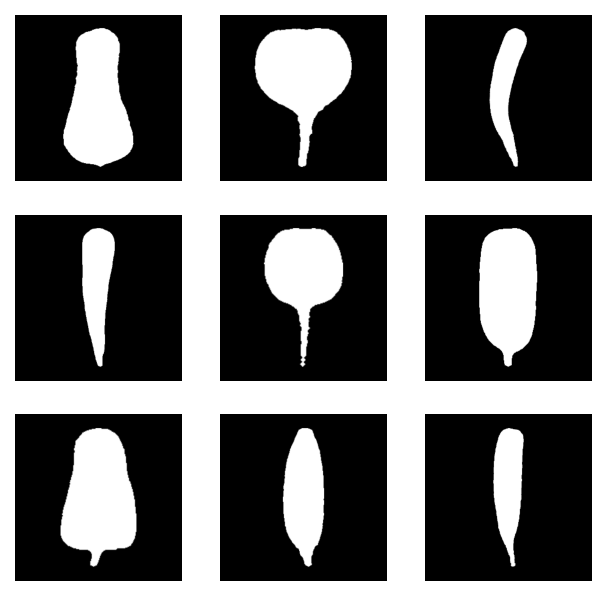

In [2]:
NSilF = labhome+'/RDSamples/NSilImages' # 正規化されたシルエット画像のフォルダ
imgs = rd.collectimages(NSilF)       # シルエット画像のリスト
#imgs = collectimages(NSilF)       # シルエット画像のリスト
plt.figure(figsize=(5,5),dpi=150)
for i in range(9):
  rd.plotimg(imgs[i],330+i+1)
  #plotimg(imgs[i],330+i+1)


In [3]:
import time
 
def print_proc_time(f):
    """ 計測デコレータ """
 
    def print_proc_time_func(*args, **kwargs):
        # 開始
        start_time = time.process_time()
 
        # 関数実行
        return_val = f(*args, **kwargs)
 
        # 修了
        end_time = time.process_time()
 
        # 関数名と経過時間を出力(秒)
        elapsed_time = end_time - start_time
        print(f.__name__, elapsed_time)
 
        # 戻り値を返す
        return return_val
 
    return print_proc_time_func

@print_proc_time
def fit0andDraw(imgnum,Nsamples=65,N=7):
    img = imgs[imgnum]
    conAll = rd.getCntPairWithImg(img, mode=1) # 全周輪郭を得る
    Samples = rd.getSamples(conAll,N=Nsamples,mode='Equidistant')
    bez = rd.BezierCurve(N=N,samples=Samples) # インスタンス生成
    cps, func = bez.fit0(tpara=[])
    def meanerr(func, ts):
      sps = Samples
      fx, fy = func
      t = symbols('t')
      nfx, nfy = lambdify(t, fx, "numpy"), lambdify(t, fy, "numpy")
      onps = [[nfx(ts[i]), nfy(ts[i])] for i in range(len(ts))]
      return mean([np.sqrt((sps[i][0]-onps[i][0])**2+(sps[i][1]-onps[i][1])**2) for i in range(len(sps))])

    return func, meanerr(func,ts=bez.ts), Samples

def check0N(imgnum,Nsamples=65,Nfrom=5,Nto=20,err_th=0.5,withFig=True):
    results = {}
    for N in range(Nfrom,Nto+1):
      print(N,end='')
      func, err,Samples = fit0andDraw(imgnum,Nsamples=Nsamples,N=N)
      results[str(N)] = func
      if err < err_th:
        break
    print("\nN= {}  err = {}".format(N,err))
    if withFig:
      rd.drawBez(imgs[imgnum],stt=0.0,end=1.0,bezL=func,cntL=Samples)
    return func,results

17fit0andDraw 1.484375

N= 17  err = 0.7927955063988817
Wall time: 1.55 s


(Matrix([
 [     156.0*t**17 + 174.194623671496*t**16*(17 - 17*t) + 58574.9368432736*t**15*(1 - t)**2 - 775966.747949094*t**14*(1 - t)**3 + 16391854.8447914*t**13*(1 - t)**4 - 133221047.88469*t**12*(1 - t)**5 + 631675508.0359*t**11*(1 - t)**6 - 1736975060.36246*t**10*(1 - t)**7 + 2897447633.5058*t**9*(1 - t)**8 - 2884902766.48055*t**8*(1 - t)**9 + 1738237195.28557*t**7*(1 - t)**10 - 629365878.774096*t**6*(1 - t)**11 + 137053075.03036*t**5*(1 - t)**12 - 16311503.792497*t**4*(1 - t)**13 + 1075661.07334414*t**3*(1 - t)**14 - 20807.5004787001*t**2*(1 - t)**15 + 2196.05279223271*t*(1 - t)**16 + 149.0*(1 - t)**17],
 [281.0*t**17 + 291.722810945222*t**16*(17 - 17*t) + 3507.72851930576*t**15*(1 - t)**2 + 1013276.89672873*t**14*(1 - t)**3 - 9285423.18494757*t**13*(1 - t)**4 + 54879603.757902*t**12*(1 - t)**5 - 167140743.697238*t**11*(1 - t)**6 + 298356138.258181*t**10*(1 - t)**7 - 270342963.889958*t**9*(1 - t)**8 + 75958993.9970638*t**8*(1 - t)**9 + 52102107.7135668*t**7*(1 - t)**10 - 47803581.

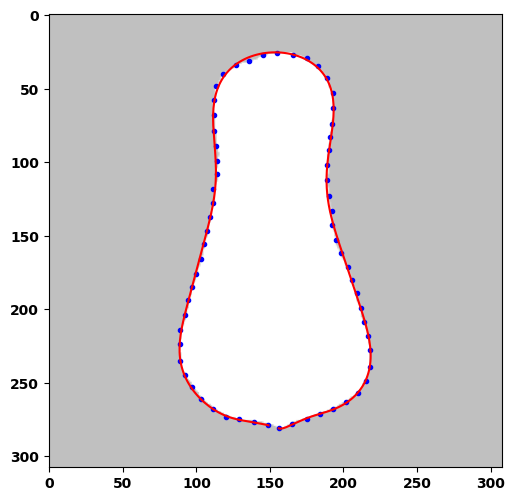

In [4]:
%%time
check0N(0,Nsamples=65,Nfrom=17,Nto=17,err_th=1,withFig=True);

18fit0andDraw 1.65625

N= 18  err = 0.9622668147162174
Wall time: 1.67 s


(Matrix([
 [154.0*t**18 + 202.36290783124*t**17*(18 - 18*t) - 18514.6946859625*t**16*(1 - t)**2 + 1256138.77863268*t**15*(1 - t)**3 - 12412174.1329181*t**14*(1 - t)**4 + 75783877.8215526*t**13*(1 - t)**5 - 199226007.423165*t**12*(1 - t)**6 + 231321190.567721*t**11*(1 - t)**7 + 263997600.842014*t**10*(1 - t)**8 - 1135547965.12903*t**9*(1 - t)**9 + 1635008668.73935*t**8*(1 - t)**10 - 1270404257.89067*t**7*(1 - t)**11 + 586104789.627771*t**6*(1 - t)**12 - 159333375.619724*t**5*(1 - t)**13 + 24627711.8280854*t**4*(1 - t)**14 - 1776944.87167595*t**3*(1 - t)**15 + 94272.8641219263*t**2*(1 - t)**16 + 1618.35465786999*t*(1 - t)**17 + 147.0*(1 - t)**18],
 [    280.0*t**18 + 296.128052354471*t**17*(18 - 18*t) - 41160.9889916843*t**16*(1 - t)**2 + 2275695.51317799*t**15*(1 - t)**3 - 30659189.6895629*t**14*(1 - t)**4 + 250855209.1683*t**13*(1 - t)**5 - 1206187701.9989*t**12*(1 - t)**6 + 3690871041.59895*t**11*(1 - t)**7 - 7212681434.25155*t**10*(1 - t)**8 + 9006820043.43573*t**9*(1 - t)**9 - 71863

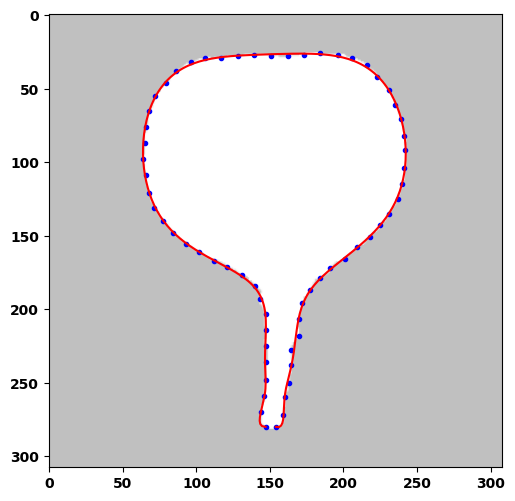

In [5]:
%%time
check0N(1,Nsamples=65,Nfrom=18,Nto=18,err_th=1,withFig=True);

20fit0andDraw 2.15625

N= 20  err = 0.9017464847202363
Wall time: 2.01 s


(Matrix([
 [167.0*t**20 + 151.266999949467*t**19*(20 - 20*t) + 22384.236975423*t**18*(1 - t)**2 + 582630.074135413*t**17*(1 - t)**3 - 13399608.6819964*t**16*(1 - t)**4 + 221721174.476228*t**15*(1 - t)**5 - 1927566900.57657*t**14*(1 - t)**6 + 10134328158.5122*t**13*(1 - t)**7 - 33214511711.7054*t**12*(1 - t)**8 + 70275299286.4264*t**11*(1 - t)**9 - 96870852998.9926*t**10*(1 - t)**10 + 87416712897.6981*t**9*(1 - t)**11 - 51308964166.3478*t**8*(1 - t)**12 + 19528589439.8829*t**7*(1 - t)**13 - 4732523435.05082*t**6*(1 - t)**14 + 720941167.261384*t**5*(1 - t)**15 - 65052226.7171844*t**4*(1 - t)**16 + 3584330.30977059*t**3*(1 - t)**17 - 57460.5717871908*t**2*(1 - t)**18 + 4235.69536858806*t*(1 - t)**19 + 171.0*(1 - t)**20],
 [ 281.0*t**20 + 313.511766364568*t**19*(20 - 20*t) - 68456.3976772042*t**18*(1 - t)**2 + 4584993.60330206*t**17*(1 - t)**3 - 81470182.3922237*t**16*(1 - t)**4 + 874458821.51879*t**15*(1 - t)**5 - 5557320009.66673*t**14*(1 - t)**6 + 22437870361.2057*t**13*(1 - t)**7 - 588

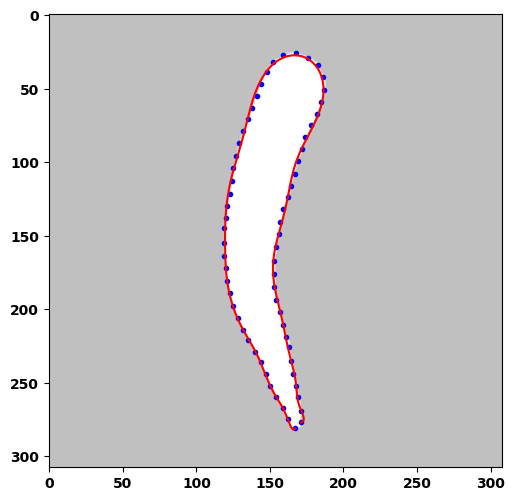

In [6]:
%%time
check0N(2,Nsamples=65,Nfrom=20,Nto=20,err_th=1,withFig=True);

16fit0andDraw 1.421875

N= 16  err = 0.9010169171550871
Wall time: 1.45 s


(Matrix([
 [   154.0*t**16 + 122.018939679813*t**15*(16 - 16*t) + 36861.6481396836*t**14*(1 - t)**2 - 373827.244241861*t**13*(1 - t)**3 + 4455264.71634193*t**12*(1 - t)**4 - 17848096.6246706*t**11*(1 - t)**5 + 29692473.0776716*t**10*(1 - t)**6 + 34496760.0855816*t**9*(1 - t)**7 - 174485464.21813*t**8*(1 - t)**8 + 239429455.775151*t**7*(1 - t)**9 - 148127392.82699*t**6*(1 - t)**10 + 50144284.9859128*t**5*(1 - t)**11 - 8250600.8988491*t**4*(1 - t)**12 + 814742.847827783*t**3*(1 - t)**13 - 4875.9153558477*t**2*(1 - t)**14 + 2854.33296369205*t*(1 - t)**15 + 161.0*(1 - t)**16],
 [280.0*t**16 + 265.931235370813*t**15*(16 - 16*t) + 9116.4175489634*t**14*(1 - t)**2 + 529460.502915205*t**13*(1 - t)**3 - 5097020.44559132*t**12*(1 - t)**4 + 37074035.5257629*t**11*(1 - t)**5 - 140479555.414323*t**10*(1 - t)**6 + 317028784.139772*t**9*(1 - t)**7 - 413262636.651242*t**8*(1 - t)**8 + 309064691.542534*t**7*(1 - t)**9 - 133166607.457946*t**6*(1 - t)**10 + 33923305.5995309*t**5*(1 - t)**11 - 4363956.377

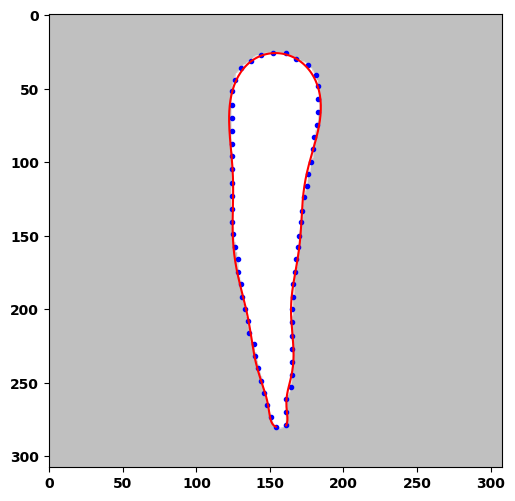

In [7]:
%%time
check0N(3,Nsamples=65,Nfrom=16,Nto=16,err_th=1,withFig=True);

20fit0andDraw 1.984375

N= 20  err = 0.9816888064809124
Wall time: 2.02 s


(Matrix([
 [  154.0*t**20 + 112.233901100251*t**19*(20 - 20*t) + 126270.601229362*t**18*(1 - t)**2 - 3176386.94172567*t**17*(1 - t)**3 + 56499933.834769*t**16*(1 - t)**4 - 477471365.66853*t**15*(1 - t)**5 + 2268914117.27442*t**14*(1 - t)**6 - 5905943495.03138*t**13*(1 - t)**7 + 8281528662.37032*t**12*(1 - t)**8 - 3525666045.97239*t**11*(1 - t)**9 - 6922155631.2928*t**10*(1 - t)**10 + 13916912001.9592*t**9*(1 - t)**11 - 12059247711.5174*t**8*(1 - t)**12 + 6069108352.54312*t**7*(1 - t)**13 - 1830303384.7186*t**6*(1 - t)**14 + 325044482.115924*t**5*(1 - t)**15 - 31269861.7345606*t**4*(1 - t)**16 + 1885462.43073713*t**3*(1 - t)**17 - 17623.3472279353*t**2*(1 - t)**18 + 3462.0341319257*t*(1 - t)**19 + 148.0*(1 - t)**20],
 [280.0*t**20 + 197.780775347349*t**19*(20 - 20*t) + 171856.636475889*t**18*(1 - t)**2 - 4844507.84377435*t**17*(1 - t)**3 + 91849085.2438316*t**16*(1 - t)**4 - 896058383.696162*t**15*(1 - t)**5 + 5297325152.91938*t**14*(1 - t)**6 - 19847502740.9682*t**13*(1 - t)**7 + 49624

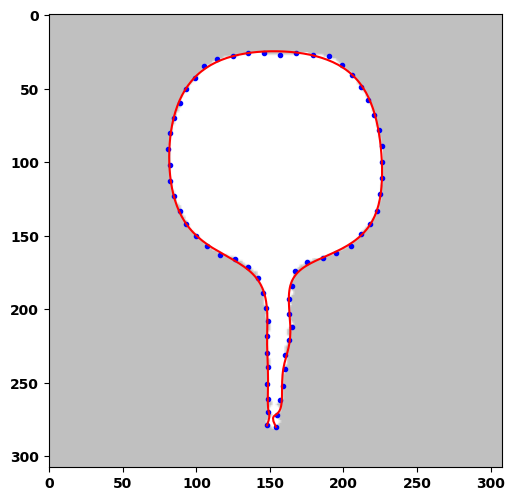

In [8]:
%%time
check0N(4,Nsamples=65,Nfrom=20,Nto=20,err_th=1,withFig=True);

15fit0andDraw 1.125

N= 15  err = 0.7400273276976692
Wall time: 1.16 s


(Matrix([
 [156.0*t**15 + 188.960370168502*t**14*(15 - 15*t) - 13245.3933830693*t**13*(1 - t)**2 + 958818.368884852*t**12*(1 - t)**3 - 8098512.94875244*t**11*(1 - t)**4 + 43084443.9201308*t**10*(1 - t)**5 - 122264008.473389*t**9*(1 - t)**6 + 211373257.234045*t**8*(1 - t)**7 - 206679952.5572*t**7*(1 - t)**8 + 119311763.787106*t**6*(1 - t)**9 - 39972190.8984833*t**5*(1 - t)**10 + 8140035.19137896*t**4*(1 - t)**11 - 832002.184824488*t**3*(1 - t)**12 + 51910.8119656164*t**2*(1 - t)**13 + 1555.94782253724*t*(1 - t)**14 + 150.0*(1 - t)**15],
 [279.0*t**15 + 237.687195678156*t**14*(15 - 15*t) + 23025.9758327648*t**13*(1 - t)**2 + 149131.705568928*t**12*(1 - t)**3 - 290781.393712503*t**11*(1 - t)**4 + 1084356.2735359*t**10*(1 - t)**5 + 2039707.83686096*t**9*(1 - t)**6 - 7042777.01649809*t**8*(1 - t)**7 + 8513847.3345324*t**7*(1 - t)**8 - 7474063.99679468*t**6*(1 - t)**9 + 4673521.64320003*t**5*(1 - t)**10 - 1160540.27763715*t**4*(1 - t)**11 + 278057.873617345*t**3*(1 - t)**12 + 12967.656527410

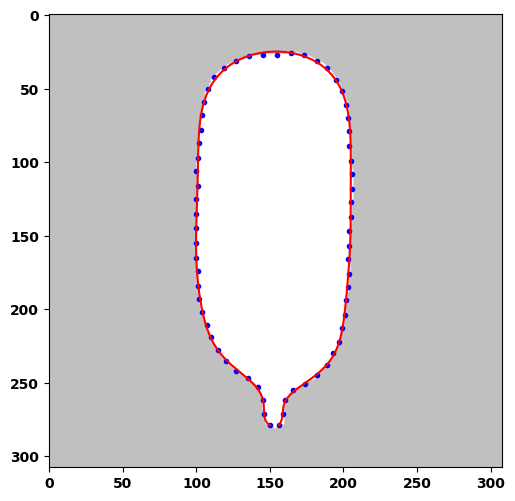

In [9]:
%%time
check0N(5,Nsamples=65,Nfrom=15,Nto=15,err_th=1,withFig=True);

17fit0andDraw 1.4375

N= 17  err = 0.7759406235822139
Wall time: 1.48 s


(Matrix([
 [  144.0*t**17 + 169.015315016554*t**16*(17 - 17*t) + 41304.2369538264*t**15*(1 - t)**2 - 864668.1291251*t**14*(1 - t)**3 + 19505158.129273*t**13*(1 - t)**4 - 151383130.969915*t**12*(1 - t)**5 + 670304925.469265*t**11*(1 - t)**6 - 1707027928.26642*t**10*(1 - t)**7 + 2637652787.99448*t**9*(1 - t)**8 - 2429724249.34886*t**8*(1 - t)**9 + 1343564349.9625*t**7*(1 - t)**10 - 434549979.433078*t**6*(1 - t)**11 + 79847748.0044108*t**5*(1 - t)**12 - 6448149.37364739*t**4*(1 - t)**13 + 102272.407588194*t**3*(1 - t)**14 + 20261.7175410028*t**2*(1 - t)**15 + 2545.39229579447*t*(1 - t)**16 + 138.0*(1 - t)**17],
 [281.0*t**17 + 295.707793231438*t**16*(17 - 17*t) - 6307.99159596625*t**15*(1 - t)**2 + 535369.936346687*t**14*(1 - t)**3 + 1447750.07137162*t**13*(1 - t)**4 - 24427279.5207257*t**12*(1 - t)**5 + 133809360.977173*t**11*(1 - t)**6 - 373804891.268557*t**10*(1 - t)**7 + 670985926.805299*t**9*(1 - t)**8 - 778834458.614614*t**8*(1 - t)**9 + 572042673.720433*t**7*(1 - t)**10 - 267176186

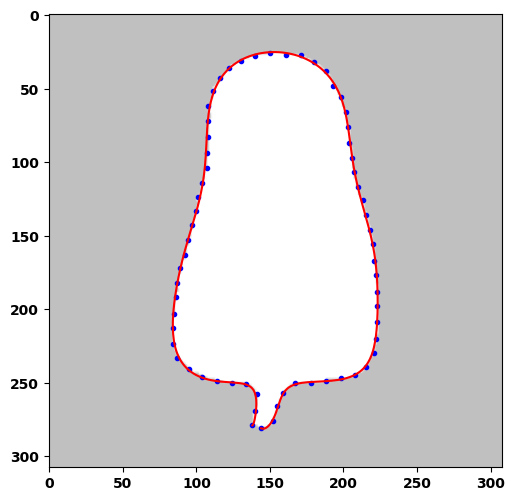

In [10]:
%%time
check0N(6,Nsamples=65,Nfrom=17,Nto=17,err_th=1,withFig=True);

19fit0andDraw 1.828125

N= 19  err = 0.9686807982950411
Wall time: 1.85 s


(Matrix([
 [ 161.0*t**19 + 113.829585004704*t**18*(19 - 19*t) + 70930.0506143483*t**17*(1 - t)**2 - 1377022.64714022*t**16*(1 - t)**3 + 25223195.9778898*t**15*(1 - t)**4 - 241644038.338341*t**14*(1 - t)**5 + 1434960805.46804*t**13*(1 - t)**6 - 5232301397.87078*t**12*(1 - t)**7 + 12198601409.8282*t**11*(1 - t)**8 - 18280528717.1143*t**10*(1 - t)**9 + 17810264452.1433*t**9*(1 - t)**10 - 11230556601.7505*t**8*(1 - t)**11 + 4624155638.4423*t**7*(1 - t)**12 - 1215139399.20167*t**6*(1 - t)**13 + 207146015.317452*t**5*(1 - t)**14 - 20617262.1788102*t**4*(1 - t)**15 + 1509194.66135645*t**3*(1 - t)**16 - 7602.81832874934*t**2*(1 - t)**17 + 3519.0013173834*t*(1 - t)**18 + 168.0*(1 - t)**19],
 [281.0*t**19 + 262.634137350301*t**18*(19 - 19*t) + 40371.5045902715*t**17*(1 - t)**2 + 46127.8900180798*t**16*(1 - t)**3 + 2978956.92228645*t**15*(1 - t)**4 + 1649818.56537115*t**14*(1 - t)**5 - 176535382.665955*t**13*(1 - t)**6 + 1438832497.82556*t**12*(1 - t)**7 - 5403479084.10936*t**11*(1 - t)**8 + 1159

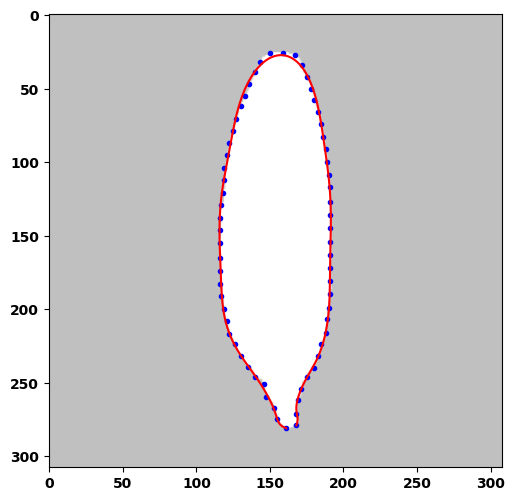

In [11]:
%%time
check0N(7,Nsamples=65,Nfrom=19,Nto=19,err_th=1,withFig=True);

18fit0andDraw 1.609375

N= 18  err = 0.8743403885302742
Wall time: 1.65 s


(Matrix([
 [159.0*t**18 + 162.574435796737*t**17*(18 - 18*t) + 7529.86438018211*t**16*(1 - t)**2 + 541234.137222903*t**15*(1 - t)**3 - 5154487.70731017*t**14*(1 - t)**4 + 27988451.8600912*t**13*(1 - t)**5 + 793277.044658632*t**12*(1 - t)**6 - 477405132.379608*t**11*(1 - t)**7 + 2007820923.57748*t**10*(1 - t)**8 - 3919865262.42687*t**9*(1 - t)**9 + 4310002709.48427*t**8*(1 - t)**10 - 2761220226.45147*t**7*(1 - t)**11 + 1069986083.72912*t**6*(1 - t)**12 - 244018579.234957*t**5*(1 - t)**13 + 33188571.2840999*t**4*(1 - t)**14 - 2156685.00407473*t**3*(1 - t)**15 + 96784.8657563701*t**2*(1 - t)**16 + 2182.31953893606*t*(1 - t)**17 + 166.0*(1 - t)**18],
 [    280.0*t**18 + 228.954703629324*t**17*(18 - 18*t) + 73242.7334037302*t**16*(1 - t)**2 - 1200927.82551672*t**15*(1 - t)**3 + 22674543.0624343*t**14*(1 - t)**4 - 191301009.290005*t**13*(1 - t)**5 + 974210975.841344*t**12*(1 - t)**6 - 2993844173.36738*t**11*(1 - t)**7 + 5765805834.01333*t**10*(1 - t)**8 - 6968055880.4661*t**9*(1 - t)**9 + 52

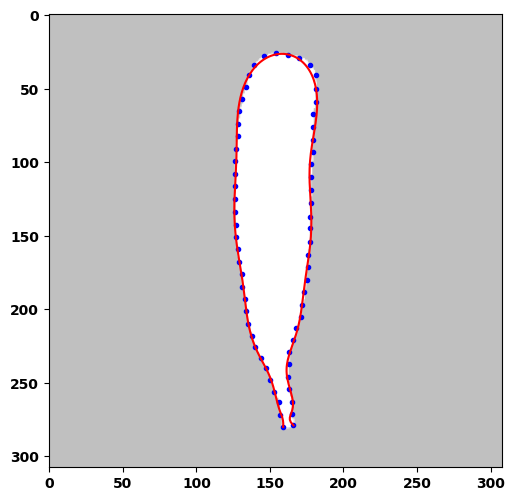

In [12]:
%%time
check0N(8,Nsamples=65,Nfrom=18,Nto=18,err_th=1,withFig=True);